<h1><u>Creating Visualizations</u></h1>

### 1. Histogram for Sales during hours of day
### 2. Bar Chart of Orders Based on Loyalty Flag 
### 3. Line Chart - Money spent on orders per time of day

## Customers Demographics EDA for Marketing Campaign
### 4. Correlation between customers age and family situation 
### 5. Correlation between customers age and spending power

In [4]:
## importing libraries & data 
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy 

path = r'/Users/aahamoustafa/Desktop/Data Projects/Instacart Basket Analysis  12-2024'

ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust.pkl'))

In [13]:
pd.set_option('display.max.columns', 35)
ords_prods_cust.head()

order_id  user_id  order_number  order_day_of_week  order_hour_of_day  \
0   2539329        1             1                  2                  8   
1   2539329        1             1                  2                  8   
2   2539329        1             1                  2                  8   
3   2539329        1             1                  2                  8   
4   2539329        1             1                  2                  8   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                  1          0   
1                     NaN       14084                  2          0   
2                     NaN       12427                  3          0   
3                     NaN       26088                  4          0   
4                     NaN       26405                  5          0   

                              product_name  aisle_id  department_id  prices  \
0                                     Soda        77              7     9.0   
1  Organic Unsweetened Vanilla Almond Milk        91             16    12.5   
2                      Original Beef Jerky        23             19     4.4   
3               Aged White Cheddar Popcorn        23             19     4.7   
4         XL Pick-A-Size Paper Towel Rolls        54             17     1.0   

     price_range_loc     Busiest_day Busiest_period_of_day  max_order  \
0  Mid range Product  Regularly Busy        Average Orders         10   
1  Mid range Product  Regularly Busy        Average Orders         10   
2  Low range Product  Regularly Busy        Average Orders         10   
3  Low range Product  Regularly Busy        Average Orders         10   
4  Low range Product  Regularly Busy        Average Orders         10   

   loyalty_flag  average_price spending_flag  median_days_since_prior_order  \
0  New customer       6.367797   Low spender                           20.5   
1  New customer       6.367797   Low spender                           20.5   
2  New customer       6.367797   Low spender                           20.5   
3  New customer       6.367797   Low spender                           20.5   
4  New customer       6.367797   Low spender                           20.5   

               freq_flag first_name surname  Gender    State  Age date_joined  \
0  Non-frequent customer      Linda  Nguyen  Female  Alabama   31   2/17/2019   
1  Non-frequent customer      Linda  Nguyen  Female  Alabama   31   2/17/2019   
2  Non-frequent customer      Linda  Nguyen  Female  Alabama   31   2/17/2019   
3  Non-frequent customer      Linda  Nguyen  Female  Alabama   31   2/17/2019   
4  Non-frequent customer      Linda  Nguyen  Female  Alabama   31   2/17/2019   

   n_dependants fam_status  income  
0             3    married   40423  
1             3    married   40423  
2             3    married   40423  
3             3    married   40423  
4             3    married   40423

### Histogram for Descriptive finding about sales during time of day 

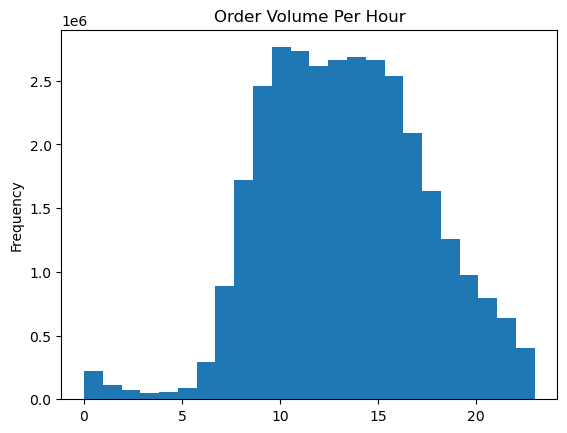

In [6]:
## order_hour_of_day sales?

hist = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Order Volume Per Hour')
plt.savefig("/Users/aahamoustafa/Desktop/Data Projects/Instacart Basket Analysis  12-2024/04 Analysis /Visualizations/Customers Orders Volume Per Hour.png")
plt.show()

#### We can see that sales starts rising from the early morning and peak at around 9-10AM and start dropping after 3PM

### 2. Bar Chart of Distribution of Orders among customers in terms of loyalty

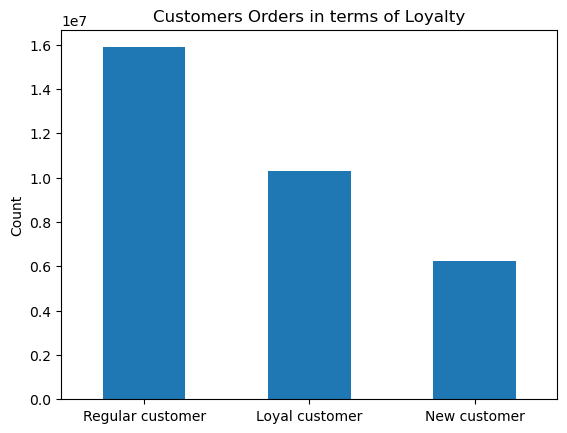

In [23]:
## creating the bar chart

bar = ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

plt.xticks(rotation=0) ## to make the ticks horizontal 
plt.ylabel('Count')
plt.xlabel('')
plt.title('Customers Orders in terms of Loyalty')
plt.savefig("/Users/aahamoustafa/Desktop/Data Projects/Instacart Basket Analysis  12-2024/04 Analysis /Visualizations/Customers Orders in terms of Loyalty.png")
plt.show()

### 3. Line Chart - Money Spent based on hour of the day

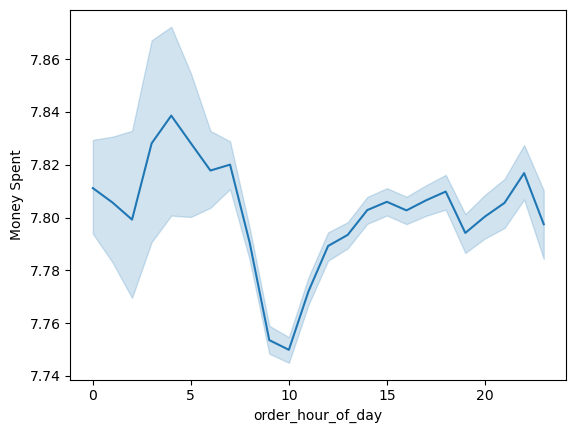

In [27]:
## creating the line chart 

line = sns.lineplot(data = ords_prods_cust, x = 'order_hour_of_day', y = 'prices')
plt.ylabel('Money Spent')
plt.savefig("/Users/aahamoustafa/Desktop/Data Projects/Instacart Basket Analysis  12-2024/04 Analysis /Visualizations/Money Spent across the day.png")
plt.show()

Consumer Behavior Analysis:

Late Night - Early morning orders might reflect purchases of premium or last-minute items.
Mid-day stability and evening slight increase might correspond to routine grocery shopping after work hours.

## Customers Demographics EDA for Marketing Campaign


### 4. correlation between age and family situation( number of dependents)?


Correlation between age and number of dependents: -0.00


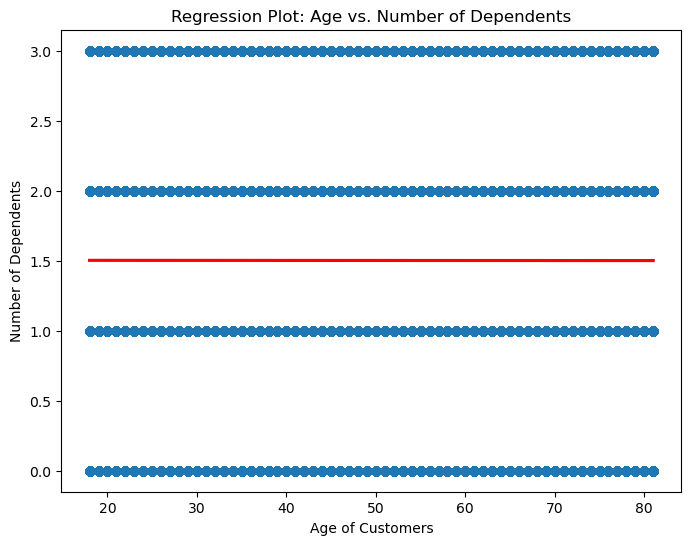

In [32]:
## correlation between age and family situation( number of dependents)?


# Calculate the correlation coefficient
correlation = ords_prods_cust['Age'].corr(ords_prods_cust['n_dependants'])
print(f"Correlation between age and number of dependents: {correlation:.2f}")

# Create a regression plot
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='n_dependants', data=ords_prods_cust, ci=None, line_kws={"color": "red"})
plt.title("Regression Plot: Age vs. Number of Dependents")
plt.xlabel("Age of Customers")
plt.ylabel("Number of Dependents")
plt.savefig("/Users/aahamoustafa/Desktop/Data Projects/Instacart Basket Analysis  12-2024/04 Analysis /Visualizations/Regression Plot: Age vs. Number of Dependents.png")
plt.show()


#### The red regression line is flat (horizontal), indicating no linear relationship between the Age of Customers (x-axis) and the Number of Dependents (y-axis).

### 5. correlation between age and spending power(income)?

Correlation between age and income: 0.42


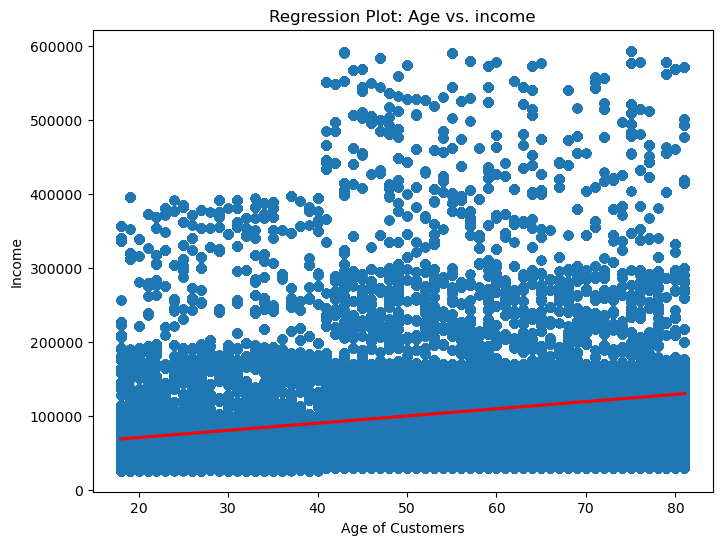

In [5]:
# Calculate the correlation coefficient
correlation = ords_prods_cust['Age'].corr(ords_prods_cust['income'])
print(f"Correlation between age and income: {correlation:.2f}")

# Create a regression plot
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='income', data=ords_prods_cust, ci=None, line_kws={"color": "red"})
plt.title("Regression Plot: Age vs. income")
plt.xlabel("Age of Customers")
plt.ylabel("Income")
plt.savefig("/Users/aahamoustafa/Desktop/Data Projects/Instacart Basket Analysis  11-2024/04 Analysis /Visualizations/age_vs_income.png")
plt.show()

#### The red regression line shows a slight positive slope, suggesting that as the age of customers increases, their income tends to increase slightly.
However, the correlation value (0.42) indicates a moderate positive correlation at best, meaning age alone does not strongly explain variations in income